In [ ]:
%%file g.1
5 4
5
6
6 7
0
0 1
2 3
3

Overwriting g.1


In [ ]:
import graphviz

with open('g.1') as f:
    G = [[int(y) for y in x.split()] for x in f.readlines()]
    print(G)

L = [0, 1, 2, 3]
R = [4, 5, 6, 7]

[[5, 4], [5], [6], [6, 7], [0], [0, 1], [2, 3], [3]]


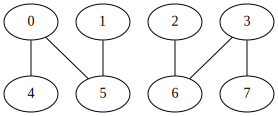

In [ ]:
def showG(G):
    dot = graphviz.Graph()
    edges = {}
    n = len(G)
    for i in range(n):
        dot.node(f'{i}')

    for u in range(n):
        for v in G[u]:
            if f'{u},{v}' not in edges:
                edges[f'{u},{v}'] = 1
                edges[f'{v},{u}'] = 1
                dot.edge(f'{u}', f'{v}')
    return dot

showG(G)

In [ ]:
#import pdb

def augPath(G, L, R, M):
    n = len(G)
    m = []
    for u, v in M:
        m.append(u)
        m.append(v)
    m = set(m)
    status = ['f' if i not in m else 'm' for i in range(n)]
    # print(status)
    path = []
    visited = [False] * n
    def dfs(u):
        visited[u] = True
        for v in G[u]:
            if visited[v]:
                continue
            path.append((u, v))
            if v in R and status[v] == 'f':
                return True
            if dfs(v):
                return True
            path.pop()
        return False

    for u in L:
        #pdb.set_trace()
        if status[u] == 'f':
            if dfs(u):
                return path

    return None

In [ ]:
def symmetricDiff(A, B):
    return [(i, j) for i, j in A if (i, j) not in B and (j, i) not in B] + [(i, j) for i, j in B if (i, j) not in A and (j, i) not in A]

In [ ]:
def maxBipartiteMatching(G, L, R):
    M = []
    P = augPath(G, L, R, M)
    while P:
        # print(P)
        M = symmetricDiff(M, P)
        P = augPath(G, L, R, M)
    print(M)

maxBipartiteMatching(G, L, R)

[(1, 5), (0, 4), (2, 6), (3, 7)]
